In [1]:
# Step 1: Import necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Step 2: Load and preprocess the dataset
def preprocess_data(data): # Normalize the dataset using MinMaxScaler
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    return data, scaler

def create_sequences(data, seq_length): # Return input and target sequences for the LSTM model
    inputs, targets = [], []
    for i in range(len(data) - seq_length):
        inputs.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(inputs), np.array(targets)

# Load the dataset from CSV
data = pd.read_csv("rainfall_data.csv")
data = data.drop("Year", axis=1)

In [3]:
# Preprocess and split the dataset into training and testing sets
data, scaler = preprocess_data(data.values)
seq_length = 4
inputs, targets = create_sequences(data, seq_length)
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.2, shuffle=False)

In [4]:
# Step 3: Define the neural network architecture, LSTM based Neural Network is defined
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x

In [5]:
# Step 4: Train the neural network
def train_model(model, criterion, optimizer, train_inputs, train_targets, epochs=100):
    for epoch in range(epochs):
        inputs = torch.tensor(train_inputs, dtype=torch.float32)
        targets = torch.tensor(train_targets, dtype=torch.float32)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}")

input_size = 12
hidden_size = 32
output_size = 12
learning_rate = 0.01

model = SimpleLSTM(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_model(model, criterion, optimizer, train_inputs, train_targets)

Epoch [10/100], Loss: 0.07115505635738373
Epoch [20/100], Loss: 0.06100874021649361
Epoch [30/100], Loss: 0.05236857756972313
Epoch [40/100], Loss: 0.04230019822716713
Epoch [50/100], Loss: 0.03295513615012169
Epoch [60/100], Loss: 0.02372514083981514
Epoch [70/100], Loss: 0.01725475862622261
Epoch [80/100], Loss: 0.011310034431517124
Epoch [90/100], Loss: 0.007374343927949667
Epoch [100/100], Loss: 0.004529493860900402


In [6]:
# Step 5: Test the neural network and plot the results
def test_model(model, test_inputs):
    inputs = torch.tensor(test_inputs, dtype=torch.float32)
    outputs = model(inputs).detach().numpy()
    return outputs

predictions = test_model(model, test_inputs)
actual_values = test_targets

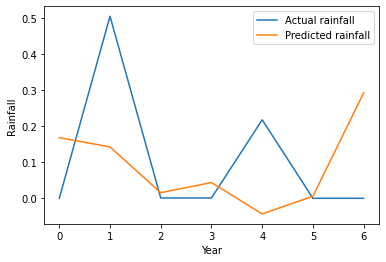

In [7]:
# Plotting the results 
plt.plot(actual_values[:, -1], label="Actual rainfall")
plt.plot(predictions[:, -1], label="Predicted rainfall")
plt.xlabel("Year")
plt.ylabel("Rainfall")
plt.legend()
plt.show()